In [1]:
# Ahora se probara agrupar mediante LDA. Lo que se busca realizar aqui es asignar una distribucion de 
# probabilidad a cada documento, en donde esta distribucion representara la probabilidad de pertenecer
# a un grupo u otro. Asimismo, los grupos tendran una distribucion de probabilidad para las palabras 
# que perteneceran a este

In [2]:
with open("objetos.txt") as txt:
    lines = txt.read().split("\n\n")

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Para este metodo, necesitamos crear la matriz de frecuencia de cada palabra.
# Aplicamos las mismas restricciones para incluir palabras que en el caso anterior, pero ademas sumamos otras que, de lo que
# fue observado, no aportan a definir el objeto de la sociedad. En particular, definimos el atributo stop_words con conectores
# que no aportan informacion relevante.

stop_w = ['de','la','a','el','que','en','los','las','con','al','sus','del','por','como','para','toda','todo']
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words=stop_w)

In [5]:
# Creamos la matriz sparse
mtx = cv.fit_transform(lines)

In [6]:
# Importamos lo necesario para realizar el metodo LDA (Latent Dirichlent Allocation)
from sklearn.decomposition import LatentDirichletAllocation

In [7]:
k = 20

In [8]:
LDA = LatentDirichletAllocation(n_components=k,random_state=7)

In [9]:
LDA.fit(mtx)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=7, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [10]:
# Observemos ahora las 10 palabras con mayor probabilidad de aparecer en cada grupo
for i, tema in enumerate(LDA.components_):
    print(f"Tema {i}:")
    print([cv.get_feature_names()[index] for index in tema.argsort()[-10:]])
    print("\n")

Tema 0:
['asesoría', 'cualquier', 'empresas', 'médicos', 'profesionales', 'asesorías', 'capacitación', 'salud', 'prestación', 'servicios']


Tema 1:
['comercialización', 'importacion', 'agricolas', 'mayor', 'verduras', 'frutas', 'comercializacion', 'compra', 'venta', 'productos']


Tema 2:
['civiles', 'servicios', 'propia', 'cuenta', 'ejecución', 'estructuras', 'industrial', 'tipo', 'construcción', 'obras']


Tema 3:
['otros', 'informática', 'informáticos', 'producción', 'pasajeros', 'actividades', 'carretera', 'carga', 'transporte', 'servicios']


Tema 4:
['automotriz', 'producción', 'servicios', 'cualquier', 'vehiculos', 'venta', 'eventos', 'vehículos', 'general', 'turismo']


Tema 5:
['bicicleta', 'tipo', 'comercialización', 'artículos', 'actividad', 'general', 'equipos', 'accesorios', 'productos', 'belleza']


Tema 6:
['alquiler', 'automotores', 'tipos', 'maquinaria', 'vehículos', 'venta', 'equipo', 'transporte', 'otros', 'reparación']


Tema 7:
['industriales', 'articulos', 'fores

In [11]:
# Procedemos con asignar los temas a cada objeto de sociedades
temas_resultantes = LDA.transform(mtx)

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame()

In [14]:
df['Texto'] = lines

In [15]:
df['Grupo'] = temas_resultantes.argmax(axis=1)

In [16]:
df.head()

,Texto,Grupo
0,"CONSTRUCCIÓN, ALQUILER DE OTROS TIPOS DE MAQUI...",17
1,el servicio de turismo por todo el territorio ...,11
2,SALON DE BELLEZA.,5
3,"CURSOS ONLINE DE MUSICA, COCINA, CLASES DE MUS...",12
4,"el ejercicio de la actividad comercial,importa...",13


In [17]:
rep = {0:'Servicios de Salud', 1:'Comercializacion Agricola', 2:'Servicios de Construccion', 3:'Servicios Informaticos', 
       4:'Servicio Automotriz', 5:'Comercializacion de Articulos', 6:'Arriendo de Equipos de Transporte', 
       7:'Fabricacion y venta de Articulos', 8:'Servicios Generales', 9:'Venta de Insumos', 10:'Servicios de Construccion',
       11:'Servicios de Transporte', 12:'Servicios de Alimentos', 13:'Servicios Generales', 14:'Arquitectura, Ingenieria y Construccion', 
       15:'Servicios de Construccion', 16:'Servicios de Construccion', 17:'Servicios Inmobiliarios', 18:'Venta de Alimentos', 
       19:'Fabricacion y venta de Textiles'}

In [18]:
df['Nombre del Grupo'] = df['Grupo'].map(rep)

In [19]:
df.head()

,Texto,Grupo,Nombre del Grupo
0,"CONSTRUCCIÓN, ALQUILER DE OTROS TIPOS DE MAQUI...",17,Servicios Inmobiliarios
1,el servicio de turismo por todo el territorio ...,11,Servicios de Transporte
2,SALON DE BELLEZA.,5,Comercializacion de Articulos
3,"CURSOS ONLINE DE MUSICA, COCINA, CLASES DE MUS...",12,Servicios de Alimentos
4,"el ejercicio de la actividad comercial,importa...",13,Servicios Generales


In [20]:
temas_resultantes.shape

(3503, 20)

In [21]:
# Podemos graficar para algun objeto de sociedad su probabilidad de pertenecer a alguno de los temas:

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

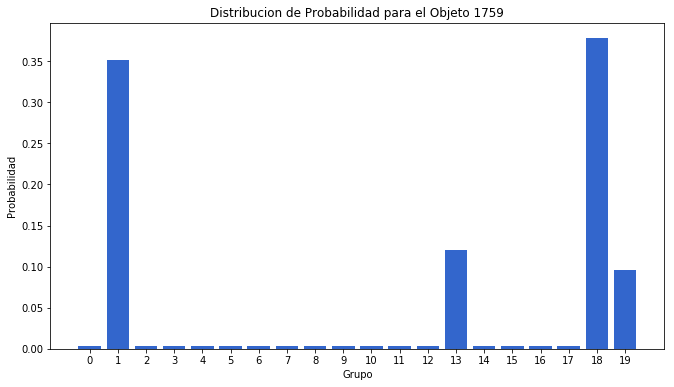

In [23]:
# Elegimos a modo aleatorio la entrada 1759
plt.figure(figsize=(11,6))
plt.xticks(range(0,20),range(0,20))
plt.bar(range(0,20),temas_resultantes[1759],color="#3366cc")
plt.title("Distribucion de Probabilidad para el Objeto 1759")
plt.xlabel("Grupo")
plt.ylabel("Probabilidad")
plt.show()

In [24]:
# Vemos que tiene mayor probabilidad de pertenecer al grupo 18, y como segunda opcion al grupo 1:
print('Grupo mas probable: '+rep[18])
print('Segundo grupo probable: '+rep[1])
print(df['Texto'].iloc[1759])

Grupo mas probable: Venta de Alimentos
Segundo grupo probable: Comercializacion Agricola
COMERCIALIZACION Y FABRICACIÓN DE MUEBLES, ELABORACIÓN DE OTROS PRODUCTOS ALIMENTICIOS, COMERCIALIZACION DE PRODUCTOS ALIMENTICIOS, EXPLOTACION DE NEGOCIOS DE CAFETERIAS Y RESTAURANTES.


In [25]:
# Observemos cual de todos los grupos es el que se repite con mayor frecuencia

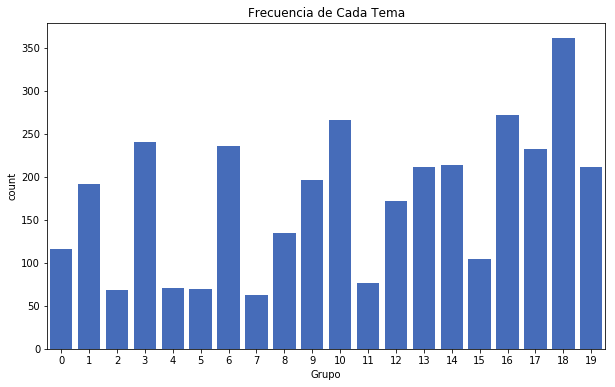

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Grupo',data=df,color="#3366cc")
plt.title("Frecuencia de Cada Tema")
plt.show()

In [27]:
# Observamos que el grupo 18 es el que aparece mas veces
print(rep[18])

Venta de Alimentos


In [28]:
# Para este caso, se definieron 16 grupos unicos. En el siguiente metodo, trataremos de identificar 15 grupos 
# de otra forma.
len(df['Nombre del Grupo'].unique())

16